#### 2-dimentional animation for particles

This code produce an animation of particles.

In [40]:
#########/ data initializing /#################################################
import numpy as np
particles = []
particles_px = []

with open("particles_data.txt", 'r') as f:
    NUMBER_OF_PARTICLES = (int)(f.readline())
    TIME_dt = f.readline().split(',')
    TIME = (int)(TIME_dt[0])
    dt = (float)(TIME_dt[1])
    SIZE_X_Y = f.readline().split(',')
    SIZE_X = (float)(SIZE_X_Y[0])
    SIZE_Y = (float)(SIZE_X_Y[1])
    for t in range (TIME):
        temp = f.readline() 
        temp = temp.split(';')[:-1]
        particles_t = []
        particle_xy = temp[0].split(',')[0]
        particle_pxpy = temp[0].split(',')[1]
        particles.append([float(particle_xy.split(' ')[0]), float(particle_xy.split(' ')[1])])
        particles_px.append(float(particle_pxpy.split(' ')[0]))
        
particles = np.asarray(particles)
particles_px = np.asarray(particles_px)

<IPython.core.display.Javascript object>


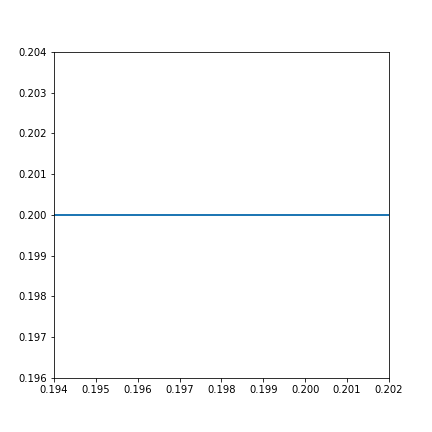

In [41]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, xlim=(0.194, 0.202),  ylim=(0.196, 0.204))

_particles, = ax.plot(particles[:,0], particles[:,1], '-')

#X, Y = np.mgrid[0.1:1.96:5j, 0:1.95:5j]
#U = [-1]
#V = [ 0]
#C = -X
#ax.quiver(X, Y, U, V, C, width=0.01, headwidth=2)

plt.show()
#plt.savefig("second order form-factor.png")

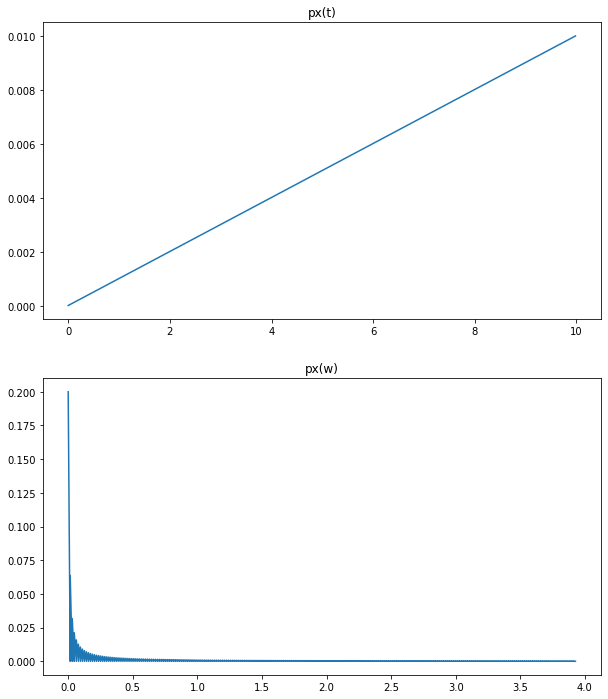

In [43]:
%matplotlib inline
import numpy as np
from scipy.fftpack import rfft, rfftfreq

f_t = particles_px
t = np.asarray(range(TIME))*dt

f_w = rfft(f_t)
w = rfftfreq(TIME, dt)*2*np.pi

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211); ax1.set_title('px(t)')
ax2 = fig.add_subplot(212); ax2.set_title('px(w)')

f_t_ = ax1.plot(t[:500], f_t[:500])
f_w_ = ax2.plot(w[:500], np.abs(f_w[:500])/len(f_w))

#fig.savefig('px(t), px(w) 20201118.png')